# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames



# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
data.shape

(45222, 14)

In [3]:
# The number of individuals making more than $50000 annually
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [4]:
# The number of individuals making at most $50000 annually
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [5]:
# The percentage of individuals making at more than $50000 annually
data['income'].value_counts(normalize=True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

### Exercise 2 Preprocessing 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27108\2635501248.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-gain'], ax=axes[0])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27108\2635501248.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['capital-loss'], ax=axes[1])


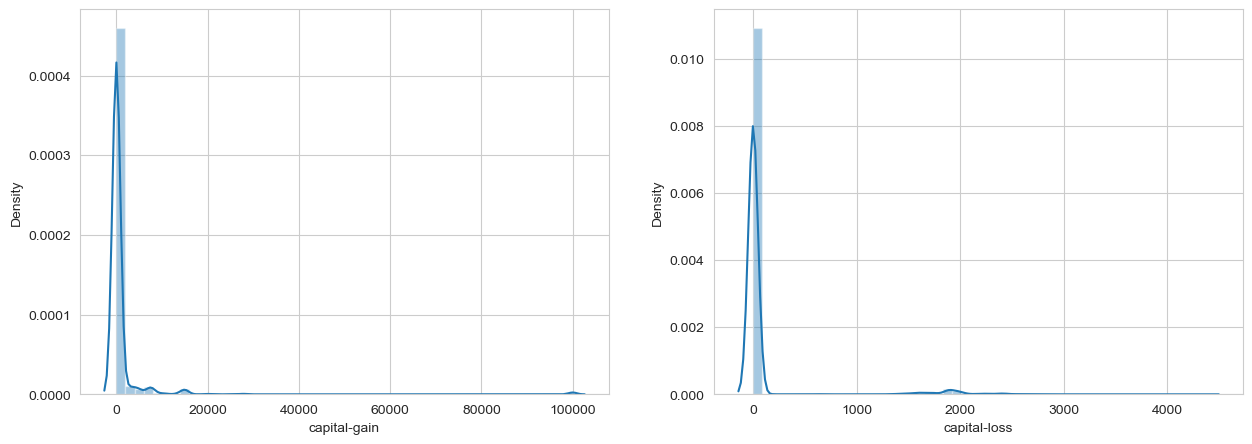

In [6]:
# Visualize skewed continuous features of original data
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.distplot(data['capital-gain'], ax=axes[0])
sns.distplot(data['capital-loss'], ax=axes[1])

# print("ori gain kurt: {}".format(data['capital-gain'].kurt()))
# print("ori loss kurt: {}".format(data['capital-loss'].kurt()))


plt.show()

In [7]:
# Outliers Treatment
import scipy.stats as stats
data['gz'] = stats.zscore(data['capital-gain'])
data['lz'] = stats.zscore(data['capital-loss'])
data = data[(data['gz'] > -3) & (data['gz'] < 3) & (data['lz'] > -3) & (data['lz'] < 3)].reset_index()


data['capital-gain'] = np.log(data['capital-gain'] + 1)
data['capital-loss'] = np.log(data['capital-loss'] + 1)

# data['capital-gain'] = np.sqrt(data['capital-gain'] + 1)
# data['capital-loss'] = np.sqrt(data['capital-loss'] + 1)


print("gain kurt: {}".format(data['capital-gain'].kurt()))
print("loss kurt: {}".format(data['capital-loss'].kurt()))

gain kurt: 7.746106087738881
loss kurt: 691.6931849196312


In [8]:
# Data Transformation
data['age'] = data['age'].astype('float64')

print("gain kurt: {}".format(data['capital-gain'].kurt()))
print("loss kurt: {}".format(data['capital-loss'].kurt()))

data['gz'] = stats.zscore(data['capital-gain'])
data['lz'] = stats.zscore(data['capital-loss'])

print("gz kurt: {}".format(data['gz'].kurt()))
print("lz kurt: {}".format(data['lz'].kurt()))

# Perform one-hot encoding on the data
data = pd.get_dummies(data, columns=['workclass','education_level', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], drop_first=True)
data['income'] = data['income'] == '>50K'
data = data.drop('index', axis=1)
data.dtypes



gain kurt: 7.746106087738881
loss kurt: 691.6931849196312
gz kurt: 7.7461060877388865
lz kurt: 691.6931849196307


age                                float64
education-num                      float64
capital-gain                       float64
capital-loss                       float64
hours-per-week                     float64
                                    ...   
native-country_ Thailand             uint8
native-country_ Trinadad&Tobago      uint8
native-country_ United-States        uint8
native-country_ Vietnam              uint8
native-country_ Yugoslavia           uint8
Length: 97, dtype: object

### Exercise 3 Shuffle and Split Data

In [9]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split

Y = data['income']
X = data.drop('income', axis=1)
print(Y.dtypes)
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

bool


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

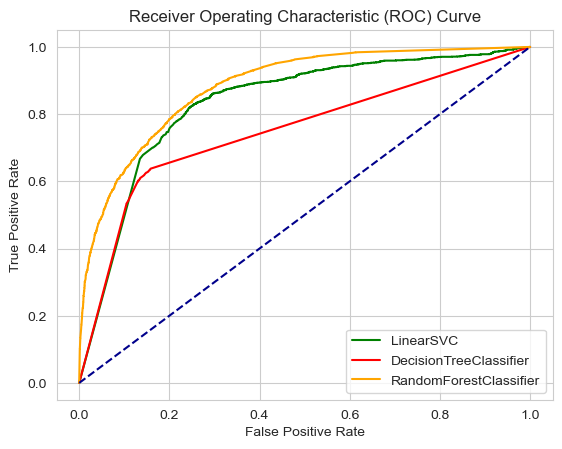

In [13]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics


model1 = GaussianNB()
model1.fit(X_train, y_train)
pre_pro = model1.predict_proba(X_test)[:,1]
fper, tper, thresholds = metrics.roc_curve(y_test, pre_pro)
plt.plot(fper, tper, color='green', label='GaussianNB')

model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
pre_pro = model2.predict_proba(X_test)[:,1]
fper, tper, thresholds = metrics.roc_curve(y_test, pre_pro)
plt.plot(fper, tper, color='red', label='DecisionTreeClassifier')

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
pre_pro = model3.predict_proba(X_test)[:,1]
fper, tper, thresholds = metrics.roc_curve(y_test, pre_pro)
plt.plot(fper, tper, color='orange', label='RandomForestClassifier')


plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [ ]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

sim = np.ones((8567, 1))
print(metrics.accuracy_score(y_test, sim))
print(metrics.f1_score(y_test, sim))


## Question:
### Q1:

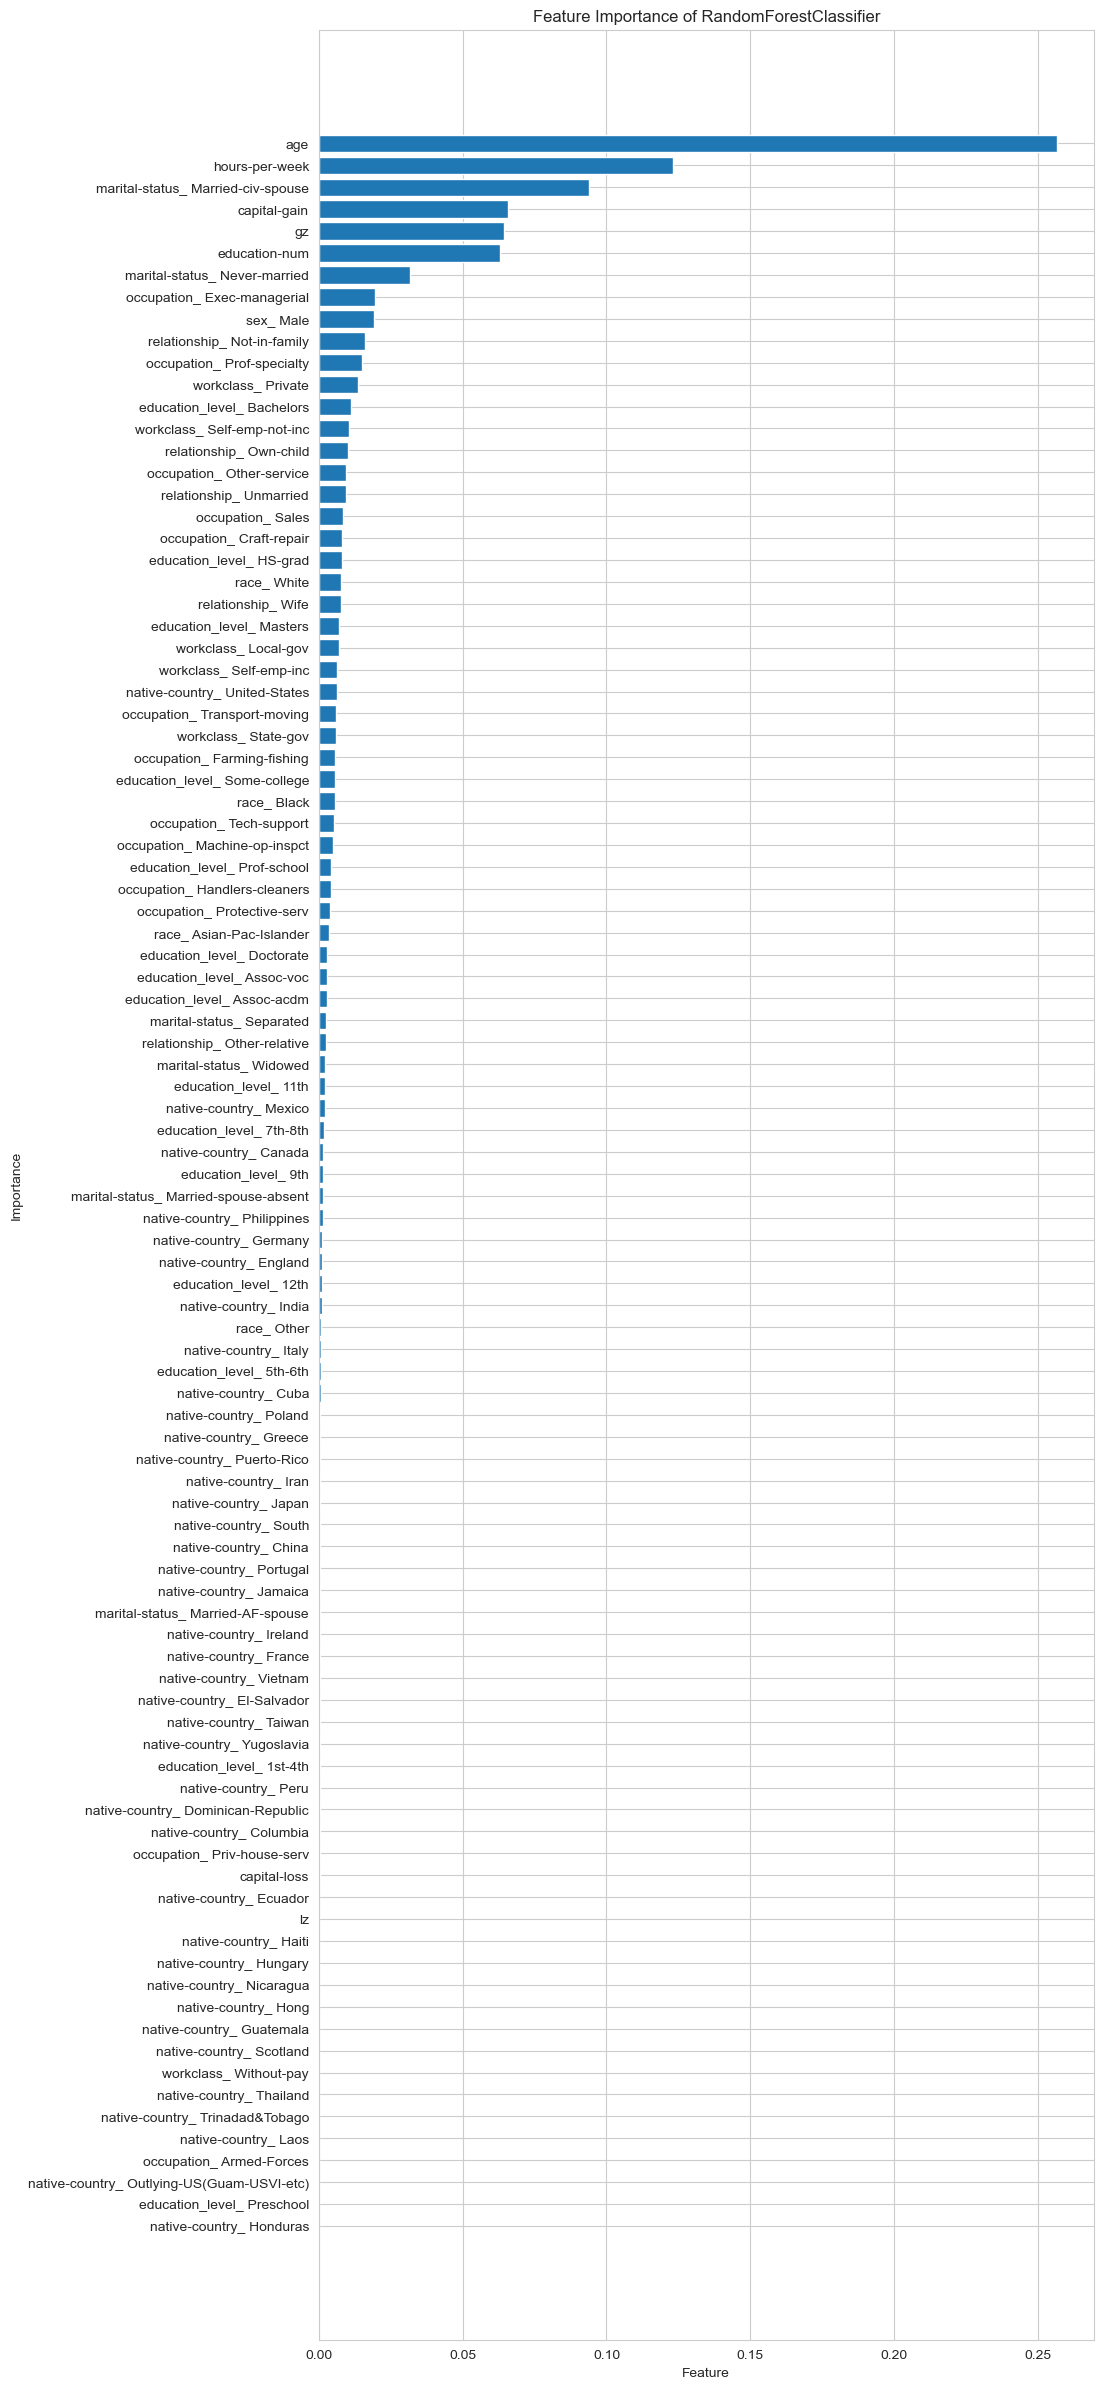

In [29]:


# 获取特征重要程度
importances = model3.feature_importances_
# 将特征重要程度和特征名称放在一个数据框中
df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
# 按照特征重要程度降序排序
df = df.sort_values(by='importance', ascending=True)
# 绘制条形图
plt.figure(figsize=(10,30))
plt.barh(df['feature'], df['importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance of RandomForestClassifier')

plt.show()



（1）一个可以应用机器学习模型的工业界的真实应用是产品推荐。这是根据客户的喜好、行为或购买历史，向他们推荐相关的产品或服务的任务。例如，亚马逊使用机器学习算法来推荐客户可能感兴趣的产品，基于他们的浏览模式、以前的购买和购物车历史。

（2）一个可能的产品推荐的机器学习模型是协同过滤。这是一种使用用户的评分或反馈来找到他们之间的相似性，并推荐相似用户喜欢的产品的技术。例如，如果用户A和用户B都喜欢产品X和Y，而用户A也喜欢产品Z，那么协同过滤可以推荐产品Z给用户B，假设他们有相似的品味。

（3）协同过滤的优点是：

它可以提供个性化的推荐，匹配每个用户的喜好，而不是基于产品的流行度或特征的通用推荐。
它可以发现影响用户喜好的潜在因素，如类型、风格或主题，而不需要显式的信息关于产品或用户。
它可以利用用户的集体智慧，因为更多的评分或反馈可以提高推荐的质量和多样性。
（4）协同过滤的缺点是：

它受到冷启动问题的困扰，这意味着它不能为没有收到任何评分或反馈的新用户或新产品提供推荐。
它受到稀疏性问题的困扰，这意味着它不能为收到很少评分或反馈的用户或产品提供推荐，因为他们之间的相似性很难估计。
它受到可扩展性问题的困扰，这意味着它在寻找大量用户或产品之间的相似性时，可能会计算代价很高，尤其是在实时场景中。
（5）协同过滤是产品推荐问题的一个好的候选模型，考虑到我们对数据的了解，因为：

数据由用户对产品的评分或反馈组成，这适合协同过滤，因为它可以使用这些信息来找到用户或产品之间的相似性，并相应地提供推荐。
数据可能是动态和演变的，因为新的用户或产品可能加入系统，而现有的用户或产品可能随着时间改变他们的喜好。协同过滤可以通过根据最新的评分或反馈来更新相似性和推荐来适应这些变化。
数据可能是多样和复杂的，因为不同的用户或产品可能有不同的特征、喜好或行为。协同过滤可以通过发现影响用户或产品喜好的潜在因素，并提供匹配这些因素的推荐来处理这种多样性和复杂性。